In [31]:
## Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import prettypandas
%matplotlib inline

In [33]:
## Load the Data
loans = pd.read_csv("loan.csv", keep_default_na=False, low_memory=False)

In [34]:
## Make all columns viewable
pd.set_option('display.max_columns', 500)

## Data Exploration and Evaluation

In [35]:
loans.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,,,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,,Jan-2016,0.0,,1.0,INDIVIDUAL,,,,0.0,,,,,,,,,,,,,,,,,


In [36]:
loans.shape

(887379, 74)

In [37]:
## Get basic statistics for numeric columns
loans.describe(include=[np.number])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.0
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,18.157039,1.692079e+04,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,1.0
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,17.190626,2.242679e+04,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.0
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,11.910000,6.443000e+03,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,1.0
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,17.650000,1.187500e+04,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,1.0
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,23.950000,2.082900e+04,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,1.0
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9999.000000,2.904836e+06,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.0


In [38]:
## Get basic statistics for non-numeric columns
loans.describe(exclude=[np.number])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379
unique,2,7,35,299273,12,6,49385,3,103,10,2,887379,124471,14,63146,935,51,30,698,29,156,124,78,33,1357,136,2,99,101,104,13,169,2,309,450,4,9,10326,327343,14,36,13,18,202,17031,1273,19,29,10708,1129,21252,19,34,30
top,36 months,B,B3,,10+ years,MORTGAGE,60000.0,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,0.0,Aug-2001,0.0,,,9.0,0.0,0.0,22.0,f,Jan-2016,Feb-2016,Jan-2016,0.0,,INDIVIDUAL,,,,0.0,0.0,,,,,,,,,,,,,,,,
freq,621125,254535,56323,51457,291569,443557,34281,329558,48631,601779,887369,1,761350,524215,414001,9770,129517,716961,6659,497905,454312,750326,80285,751572,3540,32259,456848,470150,553406,730574,875553,665676,886868,886868,886870,886868,883236,700946,70276,866007,866007,866007,866007,866569,866007,868762,866007,866007,866007,866007,70276,866007,866007,866007


In [39]:
## Convert certain numeric variables to numeric dtypes
loans['annual_inc'] = pd.to_numeric(loans['annual_inc'])
loans['annual_inc_joint'] = pd.to_numeric(loans['annual_inc_joint'])
loans['open_acc'] = pd.to_numeric(loans['open_acc'])
loans['pub_rec'] = pd.to_numeric(loans['pub_rec'])

In [40]:
## Get basic statistics for numeric columns
loans.describe(include=[np.number])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,annual_inc_joint
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.0,511.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,11.548469,0.195307,1.692079e+04,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,1.0,109981.011585
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,5.317313,0.582091,2.242679e+04,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.0,52730.379847
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,8.000000,0.000000,6.443000e+03,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,1.0,76032.500000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,11.000000,0.000000,1.187500e+04,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,1.0,101771.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,14.000000,0.000000,2.082900e+04,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,1.0,132800.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,90.000000,86.000000,2.904836e+06,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.0,500000.000000


In [41]:
## Get basic statistics for non-numeric columns
loans.describe(exclude=[np.number])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_util,total_acc,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379
unique,2,7,35,299273,12,6,3,103,10,2,887379,124471,14,63146,935,51,30,698,29,156,124,1357,136,2,99,101,104,13,169,2,450,4,9,10326,327343,14,36,13,18,202,17031,1273,19,29,10708,1129,21252,19,34,30
top,36 months,B,B3,,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,0.0,Aug-2001,0.0,,,0.0,22.0,f,Jan-2016,Feb-2016,Jan-2016,0.0,,INDIVIDUAL,,,0.0,0.0,,,,,,,,,,,,,,,,
freq,621125,254535,56323,51457,291569,443557,329558,48631,601779,887369,1,761350,524215,414001,9770,129517,716961,6659,497905,454312,750326,3540,32259,456848,470150,553406,730574,875553,665676,886868,886870,886868,883236,700946,70276,866007,866007,866007,866007,866569,866007,868762,866007,866007,866007,866007,70276,866007,866007,866007


In [42]:
#Check if individual loans appear more than once ('True' indicates they do not)
loans['id'].nunique() == len(loans)

True

In [43]:
#Check if individual members appear more than once ('True' indicates they do not)
loans['member_id'].nunique() == len(loans)

True

In [44]:
## Look at the frequency of different loan statuses
loans['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [45]:
## Look at frequency of different grades
loans['grade'].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [46]:
## Create Binary Variable for Bad Loan
good_status = ['Current', 'Fully Paid', 'Issued', 'Does not meet the credit policy. Status:Fully Paid']
loans['bad_loan (0/1)'] = loans['loan_status'].apply(lambda x: 0 if x in good_status else 1)

*Note - this assumes that loans are either good or bad; the categories in the "good_status" list above constitute good loans.*

----------------------------------------------------------------------------------------------------------------------

In [47]:
def clean_dates(date_col):
    col = pd.to_datetime(date_col)
    col = col.dt.to_period('M')
    col.fillna('', inplace=True)
    return col

In [48]:
## Convert Relevant Dates to DateTime formats
loans['issue_date_clean'] = clean_dates(loans['issue_d'])
loans['last_pymnt_date_clean'] = clean_dates(loans['last_pymnt_d'])
loans['next_pymnt_date_clean'] = clean_dates(loans['next_pymnt_d'])

In [49]:
## Create column for year of origin
loans['year_of_origin'] = loans['issue_date_clean'].apply(lambda x: x.year)

In [50]:
## Create column for loan amount in thousands
loans['loan_amount_thous'] = loans['loan_amnt'].apply(lambda x: round(x,-3))

In [51]:
## Create column for loan amount ranges and brackets
loans['loan_amnt_range']  = pd.qcut(loans['loan_amnt'], 10)
loans['loan_amnt_bracket'] = loans['loan_amnt_range'].apply(lambda x: str(int(x.left / 1000)) + "-" +
                                                      str(int(x.right / 1000)) + "k")

In [52]:
## Create integer column for interest rate
loans['int_rate_round'] = loans['int_rate'].apply(lambda x: int(x))

In [53]:
## Create columns for income ranges and brackets
loans['income_range']  = pd.qcut(loans['annual_inc'], 10)
loans['income_bracket'] = loans['income_range'].apply(lambda x: str(int(x.left / 1000)) + "-" +
                                                      str(int(x.right / 1000)) + "k")

In [54]:
## Create a column representing the interval between payments
loans['payment_interval'] = loans.apply(lambda x: x['next_pymnt_date_clean'] - x['last_pymnt_date_clean']
                                        if x['next_pymnt_date_clean'] != '' and x['last_pymnt_date_clean'] != ''
                                        else '',
                                        axis=1)

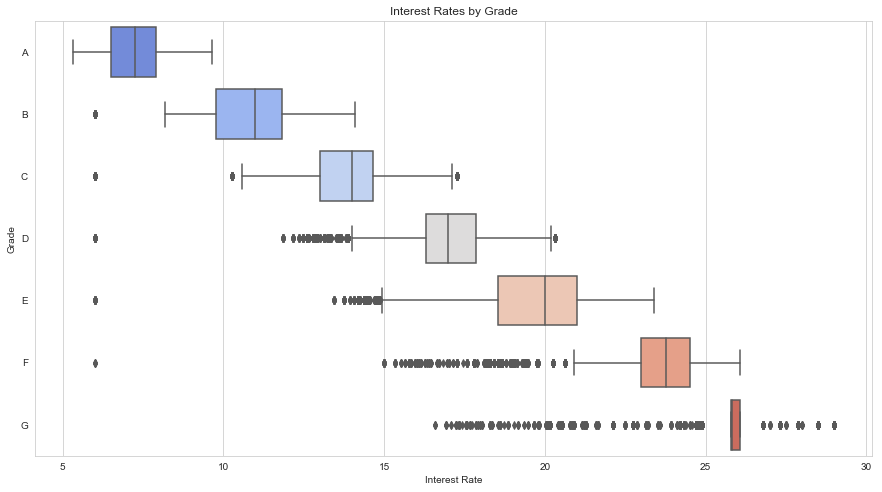

In [55]:
## Create boxplot to explore the relationship between interest rate and grade
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
boxplot = sns.boxplot(x='int_rate', y='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=loans,
                      palette='coolwarm')
boxplot.set_title("Interest Rates by Grade")
boxplot.set_xlabel("Interest Rate")
boxplot.set_ylabel("Grade")
plt.show()

*Loan grade is a consistent predictor of interest rate, though that holds less true for lower grade loans than higher ones.*

----------------------------------------------------------------------------------------------------------------------

In [56]:
## Sort Categories for Plotting
status_by_int_rate = loans.groupby('int_rate_round').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
int_rate_order = status_by_int_rate.index

status_by_grade = loans.groupby('grade').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
grade_order = status_by_grade.index

status_by_loan_amnt = loans.groupby('loan_amnt_bracket').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
loan_amnt_order = status_by_loan_amnt.index

status_by_year = loans.groupby('year_of_origin').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
year_order = status_by_year.index

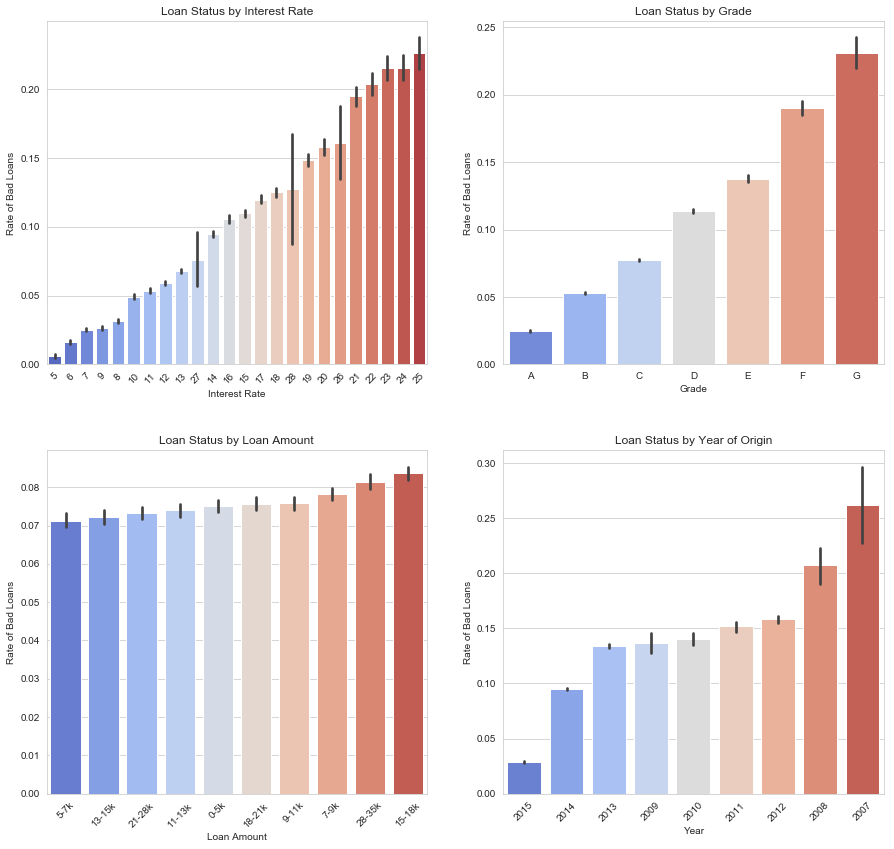

In [57]:
## Create Barplots of Loan Status 
fig = plt.figure(figsize=(15, 30))
palette = 'coolwarm'
ylabel = 'Rate of Bad Loans'

ax1 = plt.subplot(4,2,1)
sns.barplot('int_rate_round', 'bad_loan (0/1)', data=loans, order=int_rate_order, palette=palette, ax=ax1)
ax1.set_title("Loan Status by Interest Rate")
ax1.set_xlabel("Interest Rate")
ax1.set_ylabel(ylabel)
plt.xticks(rotation=45)

ax2 = plt.subplot(4,2,2)
sns.barplot('grade', 'bad_loan (0/1)', data=loans, order=grade_order, palette=palette, ax=ax2)
ax2.set_title("Loan Status by Grade")
ax2.set_xlabel("Grade")
ax2.set_ylabel(ylabel)

ax3 = plt.subplot(4,2,3)
sns.barplot('loan_amnt_bracket', 'bad_loan (0/1)', data=loans, order=loan_amnt_order, palette=palette, ax=ax3)
ax3.set_title("Loan Status by Loan Amount")
ax3.set_xlabel("Loan Amount")
ax3.set_ylabel(ylabel)
plt.xticks(rotation=45)

ax4 = plt.subplot(4,2,4)
sns.barplot('year_of_origin', 'bad_loan (0/1)', data=loans, order=year_order, palette=palette, ax=ax4)
ax4.set_title("Loan Status by Year of Origin")
ax4.set_xlabel("Year")
ax4.set_ylabel(ylabel)
plt.xticks(rotation=45)

fig.subplots_adjust(hspace=.25) ## Add vertical space between charts
plt.show()

*Some interesting patterns start to emerge here. As expected, there's a strong positive correlation between interest rates and bad loans. There's also an inverse relationship between loan grade and the frequency of bad loans. Of note, there doesn't appear to be a strong relationship between loan amount and loan status. Finally, we can see that loans originating at the beginning of the financial crisis in 07/08 fared significantly worse than those originating in recent years. Loans originating in 2015 are likely too new have gone bad as frequently as other in the data set.* 

----------------------------------------------------------------------------------------------------------------------

In [58]:
## Order Categories
status_by_income = loans.groupby('income_bracket').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
income_order = status_by_income.index

status_by_purpose = loans.groupby('purpose').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
purpose_order = status_by_purpose.index

status_homeowner = loans.groupby('home_ownership').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
homeowner_order = status_homeowner.index

app_type_order=['JOINT', 'INDIVIDUAL']

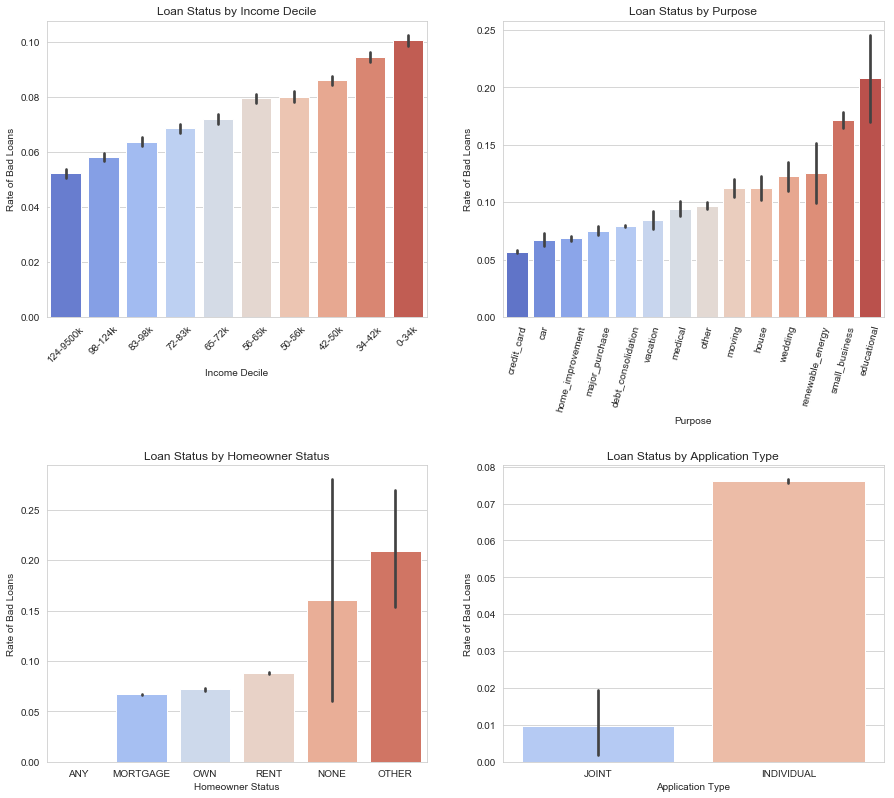

In [59]:
## Create Barplots of Loan Status 
fig = plt.figure(figsize=(15, 30))
palette = 'coolwarm'
ylabel = 'Rate of Bad Loans'

ax1 = plt.subplot(4,2,1)
sns.barplot('income_bracket', 'bad_loan (0/1)', data=loans, order=income_order, palette=palette, ax=ax1)
ax1.set_title("Loan Status by Income Decile")
ax1.set_xlabel("Income Decile")
ax1.set_ylabel(ylabel)
plt.xticks(rotation=45)

ax2 = plt.subplot(4,2,2)
sns.barplot('purpose', 'bad_loan (0/1)', data=loans, order=purpose_order, palette=palette, ax=ax2)
ax2.set_title("Loan Status by Purpose")
ax2.set_xlabel("Purpose")
ax2.set_ylabel(ylabel)
plt.xticks(rotation=75)

ax3 = plt.subplot(4,2,3)
sns.barplot('home_ownership', 'bad_loan (0/1)', data=loans, order=homeowner_order, palette=palette, ax=ax3)
ax3.set_title("Loan Status by Homeowner Status")
ax3.set_xlabel("Homeowner Status")
ax3.set_ylabel(ylabel)

ax4 = plt.subplot(4,2,4)
sns.barplot('application_type', 'bad_loan (0/1)', data=loans, order=app_type_order, palette=palette, ax=ax4)
ax4.set_title("Loan Status by Application Type")
ax4.set_xlabel("Application Type")
ax4.set_ylabel(ylabel)

fig.subplots_adjust(hspace=.5) ## Add vertical space between charts
plt.show()

### Create New Features

In [60]:
## Create New Features - Used for Modeling Later
for year in list(loans['year_of_origin'].unique()):
    loans['origin_year_' + str(year)] = loans['year_of_origin'].apply(lambda x: 1 if x == year else 0)
loans['renter'] = loans['home_ownership'].apply(lambda x: 1 if x == 'RENT' else 0)
loans['verified'] = loans['verification_status'].apply(lambda x: 1 if x == 'Verified' else 0)
loans['payment_plan'] = loans['pymnt_plan'].apply(lambda x: 1 if x == 'y' else 0)
loans['credit_card'] = loans['purpose'].apply(lambda x: 1 if x == 'credit_card' else 0)
loans['educ_or_small_bus'] = loans['purpose'].apply(lambda x: 1 if x == 'educational' or x == 'small_business' else 0)
loans['indiv_application'] = loans['application_type'].apply(lambda x: 1 if x == 'INDIVIDUAL' else 0)
loans['loan amnt: income ratio'] = loans.apply(lambda x: round(x['loan_amnt'] / x['annual_inc'],2) if 
                                               x['annual_inc'] != 0 else -999, axis=1)
for grade in list(loans['grade'].unique()):
    loans['grade' + grade] = loans['grade'].apply(lambda x: 1 if x == grade else 0)

In [61]:
loans['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [62]:
## Create New DataFrame containing only 36 month term loans
loans_36m = loans[loans['term'] == ' 36 months']

In [63]:
loans_36m.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bad_loan (0/1),issue_date_clean,last_pymnt_date_clean,next_pymnt_date_clean,year_of_origin,loan_amount_thous,loan_amnt_range,loan_amnt_bracket,int_rate_round,income_range,income_bracket,payment_interval,origin_year_2011,origin_year_2010,origin_year_2009,origin_year_2008,origin_year_2007,origin_year_2013,origin_year_2012,origin_year_2014,origin_year_2015,renter,verified,payment_plan,credit_card,educ_or_small_bus,indiv_application,loan amnt: income ratio,gradeB,gradeC,gradeA,gradeE,gradeF,gradeD,gradeG
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,,,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,,Jan-2016,0.0,,1.0,INDIVIDUAL,NaN,,,0.0,,,,,,,,,,,,,,,,,,0,2011-12,2015-01,,2011,5000.0,"(499.999, 5000.0]",0-5k,10,"(-0.001, 34000.0]",0-34k,,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0.21,1,0,0,0,0,0,0


* To identify the loans with at least 36 months of history available, calculate the number of months between the loan issue date and the most recent issue date in the dataset. This assumes that a) all loan histories have been kept up-to-date and b) loan histories are updated on a monthly basis.*

In [64]:
## Find the date of the most recent data
most_recent_date = loans_36m['issue_date_clean'].max()
most_recent_date

Period('2015-12', 'M')

In [65]:
## Calculate the number of months since issue for all loans
loans_36m['months_since_issue'] = loans_36m.apply(lambda x: most_recent_date - x['issue_date_clean'], axis=1)

In [66]:
## Calculate the number of loans with less than/at least 36 months of history
less_than_36m = loans_36m[loans_36m['months_since_issue'] < 36]
loans_final = loans_36m[loans_36m['months_since_issue'] >= 36]
print("Number of loans with less than 36 months of history:", len(less_than_36m))
print("Number of loans with at least 36 months of history:", len(loans_final))

Number of loans with less than 36 months of history: 546121
Number of loans with at least 36 months of history: 75004


In [67]:
loans_final['loan_status'].value_counts()

Fully Paid                                             63357
Charged Off                                             9071
Does not meet the credit policy. Status:Fully Paid      1789
Does not meet the credit policy. Status:Charged Off      649
Late (31-120 days)                                        81
Current                                                   33
Default                                                   12
In Grace Period                                            6
Late (16-30 days)                                          6
Name: loan_status, dtype: int64

In [68]:
## Sanity Check
loans_final['bad_loan (0/1)'].value_counts()

0    65179
1     9825
Name: bad_loan (0/1), dtype: int64

## Modeling

In [69]:
loans_final.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bad_loan (0/1),issue_date_clean,last_pymnt_date_clean,next_pymnt_date_clean,year_of_origin,loan_amount_thous,loan_amnt_range,loan_amnt_bracket,int_rate_round,income_range,income_bracket,payment_interval,origin_year_2011,origin_year_2010,origin_year_2009,origin_year_2008,origin_year_2007,origin_year_2013,origin_year_2012,origin_year_2014,origin_year_2015,renter,verified,payment_plan,credit_card,educ_or_small_bus,indiv_application,loan amnt: income ratio,gradeB,gradeC,gradeA,gradeE,gradeF,gradeD,gradeG,months_since_issue
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,,,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,,Jan-2016,0.0,,1.0,INDIVIDUAL,NaN,,,0.0,,,,,,,,,,,,,,,,,,0,2011-12,2015-01,,2011,5000.0,"(499.999, 5000.0]",0-5k,10,"(-0.001, 34000.0]",0-34k,,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0.21,1,0,0,0,0,0,0,48


In [70]:
# features = ['origin_year_2008', 'origin_year_2009', 'origin_year_2010', 'origin_year_2011', 'origin_year_2012',
#             'origin_year_2013', 'origin_year_2014', 'origin_year_2015', 'loan_amnt', 'int_rate_round', 'open_acc',
#             'pub_rec', 'gradeA', 'gradeB', 'gradeC', 'gradeD', 'gradeE', 'gradeF', 'gradeG', 'renter', 'verified',
#             'payment_plan', 'credit_card', 'educ_or_small_bus', 'indiv_application','annual_inc', 'annual_inc_joint',
#             'annual_inc', 'loan amnt: income ratio']
features = ['loan_amnt', 'annual_inc', 'loan amnt: income ratio', 'open_acc']

*Note - given that the Random Forest and Decision Tree models from part 1 indicated that loan amount and annual income were by far the two most important features in the model, it may be worth exploring whether there's an interaction between loan amount and annual income. As such, I've added a variable representing the ratio of loan amount to income.* 

In [71]:
X = loans_final[features]
y = loans_final[['bad_loan (0/1)']]

In [72]:
## Test for nan values
for col in X.columns:
    if X[col].isnull().values.any():
        print(col)

annual_inc
loan amnt: income ratio
open_acc


In [73]:
## Impute dummy value for rows with nan values
X = X.fillna(-999)

In [74]:
## Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y)

*Note - because defaults (bad loans) make up a relatively small percentage of loan outcomes, it is important to use stratified samplifying so that our train/test sets have a similar proportion of cases with bad loans (defaults)*

In [75]:
## Logistic Regression Classifier
lr = LR()

## Use GridSearchCV to find the best hyperparameters

C = np.logspace(0,5,10)
#solver = ['lbfgs', 'liblinear', 'sag', 'saga']
#parameters = dict(C=C, solver=solver)
parameters = dict(C=C)

#Need to reshape y
y_train1 = y_train.iloc[:,0].as_matrix()

clf = GridSearchCV(lr, parameters, cv=5)
top_model = clf.fit(X_train, y_train1)

In [76]:
print('Best C:', top_model.best_estimator_.get_params()['C'])
#print('Best solver:', top_model.best_estimator_.get_params()['solver'])

Best C: 1.0


In [77]:
## Test Model Score
print("Model Score (% Labels Correct):", round(top_model.score(X_test,y_test),3))

Model Score (% Labels Correct): 0.869
